In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.drop('Address', axis = 1, inplace=True)

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 234.4 KB


In [7]:
df['Avg. Area Income'].nunique()

5000

# Standard Scaling

In [8]:
# Standard Scaling is used to get all the values transformed into a range (e.g. -1 to 1)
# so that higher values and lower values are treated same way by machine

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()

In [11]:
# not using the Price column since it is a Target where we want machine to estimate Price based on other parameters.
# Drop the price column but do not do the inplace so that the Price column is not dropped.

scaled_array = ss.fit_transform(df.drop('Price', axis = 1))

In [12]:
scaled_array

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [13]:
scaled_array.shape

(5000, 5)

In [14]:
# Not using Price column
df.columns[:-1]

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [15]:
# Convert the above array into DataFrame

In [16]:
X = pd.DataFrame(scaled_array, columns = df.columns[:-1])

In [17]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [18]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [19]:
# in above co-relation it is clear that there is a relation between 
# 'Avg. Area Number of Rooms' & 'Avg. Area Number of Bedrooms' independent columns.
# This means both are directly related and hence data redudency. We can drop one column since both are giving same relation
# We will drop 'Avg. Area Number of Bedrooms' as this is less related to target - Price column

In [20]:
import seaborn as sns

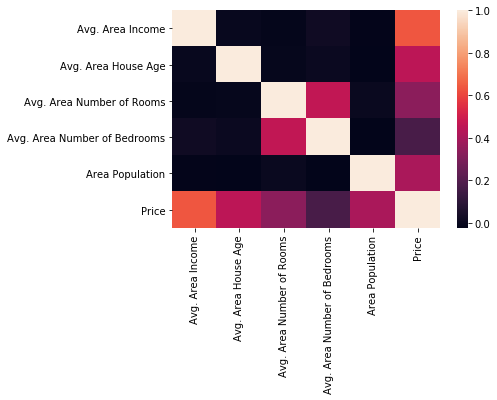

In [21]:
sns.heatmap(df.corr())

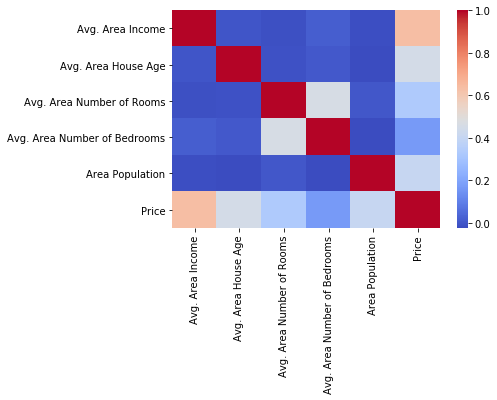

In [22]:
# for cool colors in heatmap
sns.heatmap(df.corr(), cmap='coolwarm')

In [23]:
# We will drop 'Avg. Area Number of Bedrooms' as this is less related to target - Price column
df.drop('Avg. Area Number of Bedrooms', axis = 1, inplace=True)

In [24]:
X.drop('Avg. Area Number of Bedrooms', axis = 1, inplace=True)

In [25]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.028660,-0.296927,0.021274,-1.317599
1,1.000808,0.025902,-0.255506,0.403999
2,-0.684629,-0.112303,1.516243,0.072410
3,-0.491499,1.221572,-1.393077,-0.186734
4,-0.807073,-0.944834,0.846742,-0.988387


In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
Y = df['Price']

In [28]:
type(Y)

pandas.core.series.Series

# Splitting data for training and testing

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [31]:
X_train.shape

(3500, 4)

In [32]:
Y_train.shape

(3500,)

In [33]:
X_test.shape

(1500, 4)

In [34]:
Y_test.shape

(1500,)

In [35]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
3044,0.358674,-1.618608,0.483231,-0.110898
142,-0.191043,0.376706,-1.673200,-1.956899
2460,0.891919,-0.801275,1.366920,-0.279481
990,1.344928,1.111378,0.889808,1.439055
944,0.683491,-0.441185,1.067817,2.028374


# Training the model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
model.coef_

array([230707.36823835, 165388.11073536, 123151.88879734, 151484.34440617])

In [42]:
model.intercept_

1232528.837533391

In [43]:
Y_pred = model.predict(X_test)

In [44]:
Y_pred.shape

(1500,)

In [45]:
type(Y_pred)

numpy.ndarray

# Evaluate the predictions

In [46]:
Y_test - Y_pred

2628    -25952.786700
2836    -55361.230799
1527    -25283.038434
648     125932.065540
162      51691.496642
775     220380.325908
3756    174866.123361
3305   -131018.549203
514     -60418.323503
3553      3223.557550
4524     68807.657143
2506     40498.242618
4895    -29827.087172
4182     22305.216185
2083    -64718.327051
4354   -144576.129225
3936   -117206.585145
191     -71523.783090
1938    -69285.371785
2482      9443.153091
1590    -49301.760851
2218     44408.728111
2103     71466.792241
4959    -25923.895226
345     -48717.358577
456      -7338.110352
3796   -106405.072222
4185    142433.280275
1049    101030.844984
3598      -341.750918
            ...      
3121    -30222.774184
3761     82183.494798
4888    102333.947655
4026     34811.488566
2574     38735.988620
1969      3273.046186
377    -135902.214317
4736    -94900.132620
4982    -58549.323148
3837   -208458.561790
2880      -543.882149
3155     -8153.755947
4534    -23386.013248
2300     41812.612441
1403    14

In [47]:
import matplotlib.pyplot as plt

(array([ 12.,  42., 142., 278., 356., 322., 208., 102.,  31.,   7.]),
 array([-301021.90759097, -238894.1638127 , -176766.42003443,
        -114638.67625616,  -52510.93247789,    9616.81130038,
          71744.55507865,  133872.29885692,  196000.04263519,
         258127.78641346,  320255.53019173]),
 <a list of 10 Patch objects>)

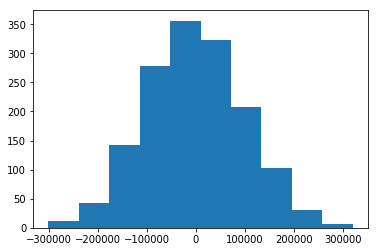

In [48]:
plt.hist(Y_test - Y_pred)

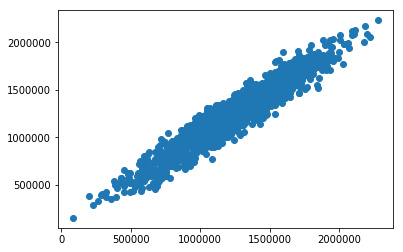

In [49]:
plt.scatter(Y_test, Y_pred)

In [50]:
from sklearn.metrics import mean_absolute_error

In [52]:
# It adds all the predicted values and divides with number of rows to give mean error value
mean_absolute_error(Y_test, Y_pred)

80871.40413276559